In [1]:
import numpy as np
from scripts.mesh import *
from scripts.simulation import *

import matplotlib
import matplotlib.pyplot as plt

# Construct the mesh to work on (topology)

In [2]:
mesh_degree_settings = MESH_DEGREE_SETTINGS
mesh_settings = MESH_SETTINGS

# mesh_degree_settings[4] = 0.75
# mesh_degree_settings[3] = 0.85
# mesh_degree_settings[2] = 0.97

print (mesh_settings)

{'grid_size': 10, 'contraction_ratio': 0.0, 'degree_settings': {2: 1, 3: 1, 4: 1, 5: 1, 6: 1}}


In [3]:
mesh = create_mesh(mesh_settings)
sparseness = calculate_sparseness(mesh)
print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')

sparseness of the created mesh (compare to the grid network) 1.0


# Valve failure simulation

## Single repair scenario 

In [4]:
vfail_rate = 0.25
pids2sim = list(mesh.valid_pids)

In [5]:
direct,unintend = mc_single_iso_consequence(mesh,vfail_rate,pids2sim)
direct_ratio = direct/len(mesh.valid_pids)
unintend_ratio = unintend/len(mesh.valid_pids)

In [6]:
def plot_single_iso_consequence(pids2sim,direct_ratio,unintend_ratio):
    plt.bar(pids2sim, direct_ratio, label="direct")
    plt.bar(pids2sim, unintend_ratio, label="unintend")
#     plt.bar(pids2sim, direct_ratio+unintend_ratio, label="tot")
    
    plt.xlabel('pid')
    plt.ylabel('Avg impact ratio')
    plt.legend()
    plt.show()
    

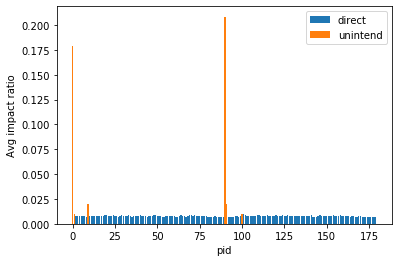

In [7]:
plot_single_iso_consequence(pids2sim,direct_ratio,unintend_ratio)

## Multiple isolation scenario 

In [8]:
degree = 3
pids2sim = list(mesh.valid_pids)
direct,unintend = mc_degree_impact(mesh,vfail_rate,degree,pids2sim)

In [9]:
direct,unintend

(4.1728, 1.9332000000000003)

In [10]:
def multi_fail_simulation(mesh,fail_rates, degree_list):
    fail_results = []
    for fail_rate in fail_rates:
        print (f'Start simulating valve fail rate {fail_rate}')
        degree_result = []
        for degree in degree_list:
            results = mc_degree_impact(mesh,fail_rate,degree,mesh.valid_pids)
            degree_result.append(results)
        fail_results.append(degree_result)
    return fail_results

In [11]:
fail_rates = np.linspace(0,0.5,5)
degree_list = list(range(1,15,2))

In [12]:
results = multi_fail_simulation(mesh,fail_rates,degree_list)

Start simulating valve fail rate 0.0
Start simulating valve fail rate 0.125
Start simulating valve fail rate 0.25
Start simulating valve fail rate 0.375
Start simulating valve fail rate 0.5


In [13]:
parsed_results = [parse_directs_unintends(result) for result in results]

In [14]:
def plot_multi_iso_consequence(parsed_results,degree_list,fail_rates):
    for i, fail_rate in enumerate(fail_rates):
        fig = plt.figure()
        direct, unintend = np.array(parsed_results[i][0]),np.array(parsed_results[i][1])
        tot = (direct+unintend) /len(mesh.valid_pids)
        plt.plot(degree_list, direct/len(mesh.valid_pids), label="direct")
        plt.plot(degree_list, unintend/len(mesh.valid_pids), label="unintend")
        plt.plot(degree_list, tot, label="tot")

        plt.xlabel('num of pipes to fix')
        plt.ylabel('# of components')
        plt.title(f'valve fail rate: {fail_rate}')
        plt.legend()
    

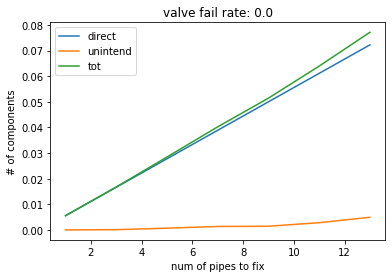

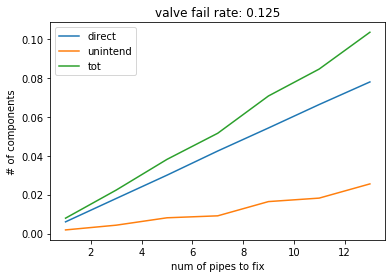

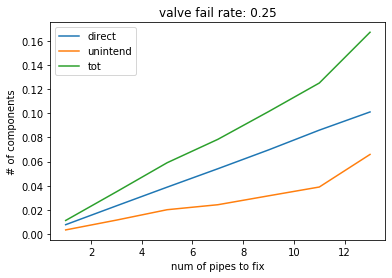

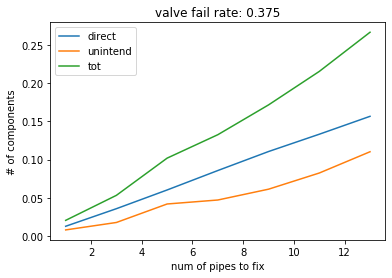

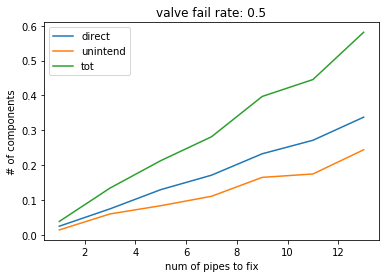

In [15]:
plot_multi_iso_consequence(parsed_results,degree_list,fail_rates)